In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [2]:
# Credit Data Processing
# For further info on constraints imposed below: see also appendix in Ustun et al (2018)
raw_df = pd.read_csv('heloc.csv')
processed_df = raw_df
# drop NAs & unnamed column & convert boolean to numeric & only keep positive records
processed_df = processed_df.dropna()
processed_df.columns
d = {'Good':0,'Bad':1}
processed_df['RiskPerformance'] = processed_df['RiskPerformance'].replace(d)
prcessed_df = processed_df + 0

In [3]:
# dropped due to many missing (aka negative) observations
#processed_df = processed_df.drop(columns=['MSinceMostRecentDelq', 'NetFractionInstallBurden', 'MSinceMostRecentTradeOpen', 'NumTradesOpeninLast12M', 'NumInstallTradesWBalance', 'NumInqLast6Mexcl7days', 'MaxDelq2PublicRecLast12M', 'MaxDelqEver'])                                      
processed_df = processed_df.drop(columns=['MSinceMostRecentDelq', 'MSinceMostRecentInqexcl7days', 'NetFractionInstallBurden'])

In [4]:
col = processed_df.columns
col

Index(['RiskPerformance', 'ExternalRiskEstimate', 'MSinceOldestTradeOpen',
       'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades',
       'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec',
       'PercentTradesNeverDelq', 'MaxDelq2PublicRecLast12M', 'MaxDelqEver',
       'NumTotalTrades', 'NumTradesOpeninLast12M', 'PercentInstallTrades',
       'NumInqLast6M', 'NumInqLast6Mexcl7days', 'NetFractionRevolvingBurden',
       'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance',
       'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance'],
      dtype='object')

In [5]:
#processed_df = processed_df.loc[processed_df['MSinceOldestTradeOpen']<300]
#processed_df = processed_df.loc[processed_df['AverageMInFile']<200]
#processed_df = processed_df.loc[processed_df['NumSatisfactoryTrades']<60]
#processed_df = processed_df.loc[processed_df['NumTrades60Ever2DerogPubRec']<8]
#processed_df = processed_df.loc[processed_df['NumTrades90Ever2DerogPubRec']<8]
#processed_df = processed_df.loc[processed_df['NumTotalTrades']<60]
#processed_df = processed_df.loc[processed_df['PercentInstallTrades']<60]
#processed_df = processed_df.loc[processed_df['MSinceMostRecentInqexcl7days']<8]
#processed_df = processed_df.loc[processed_df['NumInqLast6M']<10]
#processed_df = processed_df.loc[processed_df['NetFractionRevolvingBurden']<100]
#processed_df = processed_df.loc[processed_df['NumRevolvingTradesWBalance']<20]
#processed_df = processed_df.loc[processed_df['NumBank2NatlTradesWHighUtilization']<8]

In [6]:
print((processed_df.values[:,1] < 0).sum())
print((processed_df.values[:,2] < 0).sum())
print((processed_df.values[:,3] < 0).sum())
print((processed_df.values[:,4] < 0).sum())
print((processed_df.values[:,5] < 0).sum())

598
827
588
588
588


In [7]:
print((processed_df.values[:,6] < 0).sum())
print((processed_df.values[:,7] < 0).sum())
print((processed_df.values[:,8] < 0).sum())
print((processed_df.values[:,9] < 0).sum())
print((processed_df.values[:,10] < 0).sum())

588
588
588
588
588


In [8]:
print((processed_df.values[:,11] < 0).sum())
print((processed_df.values[:,12] < 0).sum())
print((processed_df.values[:,13] < 0).sum())
print((processed_df.values[:,14] < 0).sum())
print((processed_df.values[:,15] < 0).sum())

588
588
588
588
588


(array([5.880e+02, 0.000e+00, 0.000e+00, 9.296e+03, 3.940e+02, 1.400e+02,
        2.700e+01, 9.000e+00, 3.000e+00, 2.000e+00]),
 array([-9. , -6.2, -3.4, -0.6,  2.2,  5. ,  7.8, 10.6, 13.4, 16.2, 19. ]),
 <a list of 10 Patch objects>)

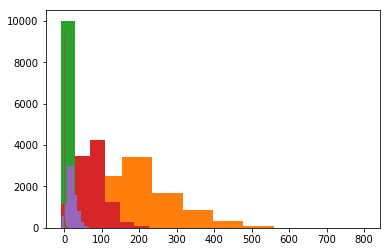

In [9]:
plt.hist(processed_df.values[:,1])
plt.hist(processed_df.values[:,2])
plt.hist(processed_df.values[:,3])
plt.hist(processed_df.values[:,4])
plt.hist(processed_df.values[:,5])
plt.hist(processed_df.values[:,6])

(array([5.880e+02, 0.000e+00, 0.000e+00, 7.005e+03, 2.046e+03, 7.020e+02,
        9.900e+01, 1.400e+01, 3.000e+00, 2.000e+00]),
 array([-9. , -6.2, -3.4, -0.6,  2.2,  5. ,  7.8, 10.6, 13.4, 16.2, 19. ]),
 <a list of 10 Patch objects>)

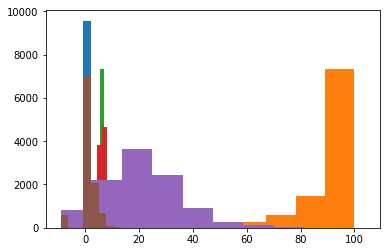

In [10]:
plt.hist(processed_df.values[:,7])
plt.hist(processed_df.values[:,8])
plt.hist(processed_df.values[:,9])
plt.hist(processed_df.values[:,10])
plt.hist(processed_df.values[:,11])
plt.hist(processed_df.values[:,12])

In [11]:
df = processed_df.values
n, p = np.shape(df)

# keep only pos values
for i in range (p):
    df = df[df[:,i] >= 0]   

In [12]:
# get label
y = df[:,0]
# get df
df_ = df[:,1::]

In [13]:
col[1::]
free = pd.DataFrame(df_, dtype='float')
free.columns = [col[1::]]
free = free + 1

labels = pd.DataFrame(y, dtype='float')
labels.columns =  [col[0]]

In [14]:
conditionals = free[['ExternalRiskEstimate', 'MSinceOldestTradeOpen', 'AverageMInFile']]

In [15]:
conditionals.head()

,ExternalRiskEstimate,MSinceOldestTradeOpen,AverageMInFile
0,56.0,145.0,85.0
1,68.0,67.0,25.0
2,67.0,170.0,74.0
3,82.0,334.0,133.0
4,60.0,138.0,79.0


In [16]:
free.describe()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MaxDelq2PublicRecLast12M,MaxDelqEver,NumTotalTrades,NumTradesOpeninLast12M,PercentInstallTrades,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
count,8291.000000,8291.000000,8291.000000,8291.000000,8291.000000,8291.000000,8291.000000,8291.000000,8291.000000,8291.000000,8291.00000,8291.000000,8291.000000,8291.000000,8291.000000,8291.000000,8291.000000,8291.000000,8291.000000,8291.000000
mean,72.783018,202.620552,9.284043,78.446026,23.580871,1.556025,1.357617,93.831022,6.741527,7.383187,25.29321,2.987577,35.673381,2.473405,2.415873,36.923290,5.327464,3.513328,2.125075,67.845495
std,9.665108,94.478782,8.661243,30.963539,11.059356,1.218511,0.961419,10.708137,1.628200,1.809892,12.59546,1.863552,15.553447,2.120066,2.079832,28.446931,3.038434,1.656994,1.547062,20.508632
min,37.000000,3.000000,1.000000,5.000000,2.000000,1.000000,1.000000,21.000000,1.000000,3.000000,2.00000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,8.000000
25%,65.000000,139.000000,4.000000,59.000000,16.000000,1.000000,1.000000,91.000000,6.000000,7.000000,16.00000,2.000000,24.000000,1.000000,1.000000,11.500000,3.000000,2.000000,1.000000,51.000000
50%,73.000000,188.000000,7.000000,76.000000,22.000000,1.000000,1.000000,98.000000,7.000000,7.000000,23.00000,3.000000,34.000000,2.000000,2.000000,32.000000,5.000000,3.000000,2.000000,68.000000
75%,81.000000,257.500000,12.000000,96.000000,30.000000,2.000000,1.000000,101.000000,8.000000,9.000000,32.00000,4.000000,46.000000,3.000000,3.000000,58.000000,7.000000,4.000000,3.000000,84.000000
max,95.000000,804.000000,107.000000,245.000000,80.000000,20.000000,20.000000,101.000000,10.000000,9.000000,105.00000,20.000000,94.000000,67.000000,67.000000,233.000000,33.000000,24.000000,19.000000,101.000000


In [17]:
conditionals.describe()

,ExternalRiskEstimate,MSinceOldestTradeOpen,AverageMInFile
count,8291.000000,8291.000000,8291.000000
mean,72.783018,202.620552,78.446026
std,9.665108,94.478782,30.963539
min,37.000000,3.000000,5.000000
25%,65.000000,139.000000,59.000000
50%,73.000000,188.000000,76.000000
75%,81.000000,257.500000,96.000000
max,95.000000,804.000000,245.000000


In [18]:
free = free.drop(columns=['ExternalRiskEstimate', 'MSinceOldestTradeOpen', 'AverageMInFile'])
free.describe()

C:\Users\fred0\Anaconda3\lib\site-packages\pandas\core\generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


,MSinceMostRecentTradeOpen,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MaxDelq2PublicRecLast12M,MaxDelqEver,NumTotalTrades,NumTradesOpeninLast12M,PercentInstallTrades,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
count,8291.000000,8291.000000,8291.000000,8291.000000,8291.000000,8291.000000,8291.000000,8291.00000,8291.000000,8291.000000,8291.000000,8291.000000,8291.000000,8291.000000,8291.000000,8291.000000,8291.000000
mean,9.284043,23.580871,1.556025,1.357617,93.831022,6.741527,7.383187,25.29321,2.987577,35.673381,2.473405,2.415873,36.923290,5.327464,3.513328,2.125075,67.845495
std,8.661243,11.059356,1.218511,0.961419,10.708137,1.628200,1.809892,12.59546,1.863552,15.553447,2.120066,2.079832,28.446931,3.038434,1.656994,1.547062,20.508632
min,1.000000,2.000000,1.000000,1.000000,21.000000,1.000000,3.000000,2.00000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,8.000000
25%,4.000000,16.000000,1.000000,1.000000,91.000000,6.000000,7.000000,16.00000,2.000000,24.000000,1.000000,1.000000,11.500000,3.000000,2.000000,1.000000,51.000000
50%,7.000000,22.000000,1.000000,1.000000,98.000000,7.000000,7.000000,23.00000,3.000000,34.000000,2.000000,2.000000,32.000000,5.000000,3.000000,2.000000,68.000000
75%,12.000000,30.000000,2.000000,1.000000,101.000000,8.000000,9.000000,32.00000,4.000000,46.000000,3.000000,3.000000,58.000000,7.000000,4.000000,3.000000,84.000000
max,107.000000,80.000000,20.000000,20.000000,101.000000,10.000000,9.000000,105.00000,20.000000,94.000000,67.000000,67.000000,233.000000,33.000000,24.000000,19.000000,101.000000


In [19]:
labels.head()

,RiskPerformance
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [20]:
conditionals.head()

,ExternalRiskEstimate,MSinceOldestTradeOpen,AverageMInFile
0,56.0,145.0,85.0
1,68.0,67.0,25.0
2,67.0,170.0,74.0
3,82.0,334.0,133.0
4,60.0,138.0,79.0


In [21]:
#Save to CSV
#pd.DataFrame(free.values).to_csv('heloc_x.csv', header = False, index = False)
#pd.DataFrame(conditionals.values).to_csv("heloc_x_c.csv", header = False, index = False)
#labels.to_csv('heloc_y.csv', header = False, index = False)